### BOT Detection using Unsupervised Algorithm

### Problem Statement:- Determine the unique IP which is suspected to be BOT.

#### Load the important Libraries to perform task

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important;}</style>"))

In [2]:
df=pd.read_csv('../input/botdetection/ibm_data.csv',index_col=0)

In [3]:
df.head(10)

,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,city,st,sec_lvl_domn,device_type,operating_sys,ip_addr,user_agent,VISIT,ENGD_VISIT,VIEWS,page_url,wk,mth,yr,page_vw_ts
0,United States,United States,North America,SLIDELL,LOUISIANA,CHARTER.COM,MOBILEPHONE,IOS_12.1.4,287e8e9aeedb50e963906f10cca7ca26ae830154e69220...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_4 LIKE...,1,0,1,www.ibm.com/watson/campaign,11,3,2019,2019-06-04 05:05:18.023100
1,Japan,Japan,Japan,TOKYO,TOKYO,MOPERA.NET,TABLET,ANDROID_6.0,d7746df5cc2de7f79584d57c2c082b9acc7697602021a1...,MOZILLA/5.0 (LINUX; ANDROID 6.0; D-01J BUILD/H...,1,0,1,www.ibm.com/privacy/us/en,11,3,2019,2019-06-04 05:07:11.014300
2,United States,United States,North America,ELK GROVE,CALIFORNIA,COMCASTBUSINESS.NET,MOBILEPHONE,IOS_12.1.2,8540464f5f376c7a160d63632f8cbedc96c61158daf9ae...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_2 LIKE...,1,0,1,www.ibm.com/account/reg/us-en/signup?formid=ur...,11,3,2019,2019-06-04 05:08:46.081900
3,Brazil,Brazil,Latin America,SAO FRANCISCO DE GOIAS,GOIAS,VIVOZAP.COM.BR,MOBILEPHONE,ANDROID_6.0,cb9ffa7be250fc62426a431a4f08bc0c8222f63514ba39...,MOZILLA/5.0 (LINUX; ANDROID 6.0; PT-BR; 5010E ...,1,0,1,www.ibm.com/analytics/br/pt/business-intelligence,11,3,2019,2019-06-04 05:07:22.033300
4,France,France,Europe,BEZONS,VAL-D'OISE,PROXAD.NET,MOBILEPHONE,ANDROID_9,7ce278be1b02a0253cc0219fa9ceddfe8e91846be343a4...,MOZILLA/5.0 (LINUX; ANDROID 9; SM-G965F BUILD/...,1,0,1,www.ibm.com/watson/fr-fr,11,3,2019,2019-06-04 05:05:27.027700
5,United States,United States,North America,BURLINGTON,WASHINGTON,COMCAST.NET,MOBILEPHONE,IOS_12.1.4,5e5f663d70a6473ac173b0d9e20313f8674eea512da420...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_4 LIKE...,1,1,1,careers.ibm.com/showjob/id/492873/user-researcher,11,3,2019,2019-06-04 05:14:33.085900
6,United States,United States,North America,BURKE,VIRGINIA,MYVZW.COM,MOBILEPHONE,ANDROID_8.0.0,fdae22d793b0bc5bb646d085fcde85951f9436e3036420...,MOZILLA/5.0 (LINUX; ANDROID 8.0.0; SM-J737V) A...,6,0,11,www.ibm.com/thought-leadership/smart,11,3,2019,2019-06-04 05:12:12.017500
7,Japan,Japan,Japan,SHIMONOSEKI,YAMAGUCHI,OCN.NE.JP,MOBILEPHONE,ANDROID_6.0,72d73da31afc11d990b9b1d7d4b156ae7fe06b320c8de2...,MOZILLA/5.0 (LINUX; ANDROID 6.0; SO-01H) APPLE...,1,0,1,www.ibm.com/jp-ja,11,3,2019,2019-06-04 05:14:32.081900
8,Singapore,ASEAN,Asia Pacific,SINGAPORE,NONE,SINGNET.COM.SG,MOBILEPHONE,IOS_12.1,c9f1ab921424744dadd5ef2b91e18f8d159e8e15da5809...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1 LIKE M...,1,1,1,www.ibm.com/sg-en/analytics/spss-trials,11,3,2019,2019-06-04 05:14:02.013000
9,Japan,Japan,Japan,TOKYO,TOKYO,SO-NET.NE.JP,TABLET,IOS_11.3,3bce5d56cf4d80d0095f066b1a0ff2d7e6a4960748b234...,MOZILLA/5.0 (IPAD; CPU OS 11_3 LIKE MAC OS X) ...,1,0,1,www.ibm.com/jp-ja/cloud/info/websphere,11,3,2019,2019-06-04 05:10:04.070700


In [4]:
# Let's bring some statistical insights fro data
df.describe()

,VISIT,ENGD_VISIT,VIEWS,wk,mth,yr
count,1.048573e+06,1.048573e+06,1.048573e+06,1048573.0,1048573.0,1048573.0
mean,1.108003e+00,3.440018e-01,1.410784e+00,11.0,3.0,2019.0
std,2.359586e+00,1.157801e+00,3.242692e+00,0.0,0.0,0.0
min,1.000000e+00,0.000000e+00,1.000000e+00,11.0,3.0,2019.0
25%,1.000000e+00,0.000000e+00,1.000000e+00,11.0,3.0,2019.0
50%,1.000000e+00,0.000000e+00,1.000000e+00,11.0,3.0,2019.0
75%,1.000000e+00,1.000000e+00,1.000000e+00,11.0,3.0,2019.0
max,1.195000e+03,6.940000e+02,1.196000e+03,11.0,3.0,2019.0


In [5]:
# Let's check the inforamtion and type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048573 entries, 0 to 1048572
Data columns (total 18 columns):
ctry_name                      1048573 non-null object
intgrtd_mngmt_name             1048573 non-null object
intgrtd_operating_team_name    1048573 non-null object
city                           1001987 non-null object
st                             1003128 non-null object
sec_lvl_domn                   729116 non-null object
device_type                    206532 non-null object
operating_sys                  1046753 non-null object
ip_addr                        1048573 non-null object
user_agent                     1048567 non-null object
VISIT                          1048573 non-null int64
ENGD_VISIT                     1048573 non-null int64
VIEWS                          1048573 non-null int64
page_url                       1048572 non-null object
wk                             1048573 non-null int64
mth                            1048573 non-null int64
yr            

In [6]:
# check fro null values
df.isnull().sum()

ctry_name                           0
intgrtd_mngmt_name                  0
intgrtd_operating_team_name         0
city                            46586
st                              45445
sec_lvl_domn                   319457
device_type                    842041
operating_sys                    1820
ip_addr                             0
user_agent                          6
VISIT                               0
ENGD_VISIT                          0
VIEWS                               0
page_url                            1
wk                                  0
mth                                 0
yr                                  0
page_vw_ts                       2743
dtype: int64

In [7]:
import datetime
df['page_vw_ts']=pd.to_datetime(df['page_vw_ts'])

In [8]:
df.page_vw_ts.dt.dayofyear.head()

0    155.0
1    155.0
2    155.0
3    155.0
4    155.0
Name: page_vw_ts, dtype: float64

In [9]:
df['ip_addr']= df['ip_addr'].astype(str)
df['VISIT']= df['VISIT'].astype(int)
df['ENGD_VISIT']= df['ENGD_VISIT'].astype(int)
df['VIEWS']= df['VIEWS'].astype(int)
df['wk']= df['wk'].astype(int)

In [10]:
df['day']=df['page_vw_ts'].dt.weekday

In [11]:
df.head()

,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,city,st,sec_lvl_domn,device_type,operating_sys,ip_addr,user_agent,VISIT,ENGD_VISIT,VIEWS,page_url,wk,mth,yr,page_vw_ts,day
0,United States,United States,North America,SLIDELL,LOUISIANA,CHARTER.COM,MOBILEPHONE,IOS_12.1.4,287e8e9aeedb50e963906f10cca7ca26ae830154e69220...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_4 LIKE...,1,0,1,www.ibm.com/watson/campaign,11,3,2019,2019-06-04 05:05:18.023100,1.0
1,Japan,Japan,Japan,TOKYO,TOKYO,MOPERA.NET,TABLET,ANDROID_6.0,d7746df5cc2de7f79584d57c2c082b9acc7697602021a1...,MOZILLA/5.0 (LINUX; ANDROID 6.0; D-01J BUILD/H...,1,0,1,www.ibm.com/privacy/us/en,11,3,2019,2019-06-04 05:07:11.014300,1.0
2,United States,United States,North America,ELK GROVE,CALIFORNIA,COMCASTBUSINESS.NET,MOBILEPHONE,IOS_12.1.2,8540464f5f376c7a160d63632f8cbedc96c61158daf9ae...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_2 LIKE...,1,0,1,www.ibm.com/account/reg/us-en/signup?formid=ur...,11,3,2019,2019-06-04 05:08:46.081900,1.0
3,Brazil,Brazil,Latin America,SAO FRANCISCO DE GOIAS,GOIAS,VIVOZAP.COM.BR,MOBILEPHONE,ANDROID_6.0,cb9ffa7be250fc62426a431a4f08bc0c8222f63514ba39...,MOZILLA/5.0 (LINUX; ANDROID 6.0; PT-BR; 5010E ...,1,0,1,www.ibm.com/analytics/br/pt/business-intelligence,11,3,2019,2019-06-04 05:07:22.033300,1.0
4,France,France,Europe,BEZONS,VAL-D'OISE,PROXAD.NET,MOBILEPHONE,ANDROID_9,7ce278be1b02a0253cc0219fa9ceddfe8e91846be343a4...,MOZILLA/5.0 (LINUX; ANDROID 9; SM-G965F BUILD/...,1,0,1,www.ibm.com/watson/fr-fr,11,3,2019,2019-06-04 05:05:27.027700,1.0


In [12]:
#Let's see the trend of year,month and day
df['year']=df.page_vw_ts.dt.year

In [13]:
df.head()

,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,city,st,sec_lvl_domn,device_type,operating_sys,ip_addr,user_agent,VISIT,ENGD_VISIT,VIEWS,page_url,wk,mth,yr,page_vw_ts,day,year
0,United States,United States,North America,SLIDELL,LOUISIANA,CHARTER.COM,MOBILEPHONE,IOS_12.1.4,287e8e9aeedb50e963906f10cca7ca26ae830154e69220...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_4 LIKE...,1,0,1,www.ibm.com/watson/campaign,11,3,2019,2019-06-04 05:05:18.023100,1.0,2019.0
1,Japan,Japan,Japan,TOKYO,TOKYO,MOPERA.NET,TABLET,ANDROID_6.0,d7746df5cc2de7f79584d57c2c082b9acc7697602021a1...,MOZILLA/5.0 (LINUX; ANDROID 6.0; D-01J BUILD/H...,1,0,1,www.ibm.com/privacy/us/en,11,3,2019,2019-06-04 05:07:11.014300,1.0,2019.0
2,United States,United States,North America,ELK GROVE,CALIFORNIA,COMCASTBUSINESS.NET,MOBILEPHONE,IOS_12.1.2,8540464f5f376c7a160d63632f8cbedc96c61158daf9ae...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_2 LIKE...,1,0,1,www.ibm.com/account/reg/us-en/signup?formid=ur...,11,3,2019,2019-06-04 05:08:46.081900,1.0,2019.0
3,Brazil,Brazil,Latin America,SAO FRANCISCO DE GOIAS,GOIAS,VIVOZAP.COM.BR,MOBILEPHONE,ANDROID_6.0,cb9ffa7be250fc62426a431a4f08bc0c8222f63514ba39...,MOZILLA/5.0 (LINUX; ANDROID 6.0; PT-BR; 5010E ...,1,0,1,www.ibm.com/analytics/br/pt/business-intelligence,11,3,2019,2019-06-04 05:07:22.033300,1.0,2019.0
4,France,France,Europe,BEZONS,VAL-D'OISE,PROXAD.NET,MOBILEPHONE,ANDROID_9,7ce278be1b02a0253cc0219fa9ceddfe8e91846be343a4...,MOZILLA/5.0 (LINUX; ANDROID 9; SM-G965F BUILD/...,1,0,1,www.ibm.com/watson/fr-fr,11,3,2019,2019-06-04 05:05:27.027700,1.0,2019.0


In [14]:
df['month']=df.page_vw_ts.dt.month

In [15]:
df.head()

,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,city,st,sec_lvl_domn,device_type,operating_sys,ip_addr,user_agent,...,ENGD_VISIT,VIEWS,page_url,wk,mth,yr,page_vw_ts,day,year,month
0,United States,United States,North America,SLIDELL,LOUISIANA,CHARTER.COM,MOBILEPHONE,IOS_12.1.4,287e8e9aeedb50e963906f10cca7ca26ae830154e69220...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_4 LIKE...,...,0,1,www.ibm.com/watson/campaign,11,3,2019,2019-06-04 05:05:18.023100,1.0,2019.0,6.0
1,Japan,Japan,Japan,TOKYO,TOKYO,MOPERA.NET,TABLET,ANDROID_6.0,d7746df5cc2de7f79584d57c2c082b9acc7697602021a1...,MOZILLA/5.0 (LINUX; ANDROID 6.0; D-01J BUILD/H...,...,0,1,www.ibm.com/privacy/us/en,11,3,2019,2019-06-04 05:07:11.014300,1.0,2019.0,6.0
2,United States,United States,North America,ELK GROVE,CALIFORNIA,COMCASTBUSINESS.NET,MOBILEPHONE,IOS_12.1.2,8540464f5f376c7a160d63632f8cbedc96c61158daf9ae...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_2 LIKE...,...,0,1,www.ibm.com/account/reg/us-en/signup?formid=ur...,11,3,2019,2019-06-04 05:08:46.081900,1.0,2019.0,6.0
3,Brazil,Brazil,Latin America,SAO FRANCISCO DE GOIAS,GOIAS,VIVOZAP.COM.BR,MOBILEPHONE,ANDROID_6.0,cb9ffa7be250fc62426a431a4f08bc0c8222f63514ba39...,MOZILLA/5.0 (LINUX; ANDROID 6.0; PT-BR; 5010E ...,...,0,1,www.ibm.com/analytics/br/pt/business-intelligence,11,3,2019,2019-06-04 05:07:22.033300,1.0,2019.0,6.0
4,France,France,Europe,BEZONS,VAL-D'OISE,PROXAD.NET,MOBILEPHONE,ANDROID_9,7ce278be1b02a0253cc0219fa9ceddfe8e91846be343a4...,MOZILLA/5.0 (LINUX; ANDROID 9; SM-G965F BUILD/...,...,0,1,www.ibm.com/watson/fr-fr,11,3,2019,2019-06-04 05:05:27.027700,1.0,2019.0,6.0


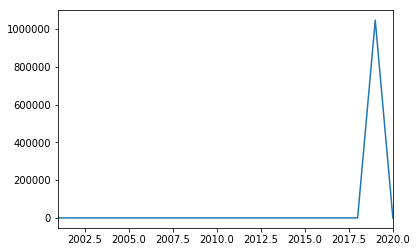

In [16]:
df.year.value_counts().sort_index().plot()

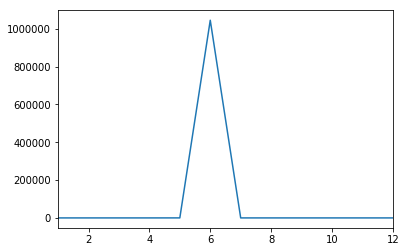

In [17]:
df.month.value_counts().sort_index().plot()

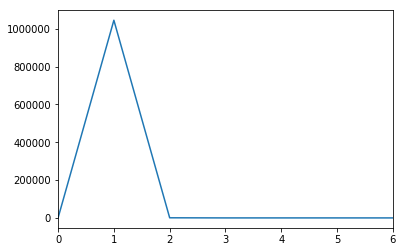

In [18]:
df.day.value_counts().sort_index().plot()

* as shown in above we can see the value of most of the year counts are 2019.
* the most of the month counts are  6.
* the most of the day counts are 1.

In [19]:
df.head()

,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,city,st,sec_lvl_domn,device_type,operating_sys,ip_addr,user_agent,...,ENGD_VISIT,VIEWS,page_url,wk,mth,yr,page_vw_ts,day,year,month
0,United States,United States,North America,SLIDELL,LOUISIANA,CHARTER.COM,MOBILEPHONE,IOS_12.1.4,287e8e9aeedb50e963906f10cca7ca26ae830154e69220...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_4 LIKE...,...,0,1,www.ibm.com/watson/campaign,11,3,2019,2019-06-04 05:05:18.023100,1.0,2019.0,6.0
1,Japan,Japan,Japan,TOKYO,TOKYO,MOPERA.NET,TABLET,ANDROID_6.0,d7746df5cc2de7f79584d57c2c082b9acc7697602021a1...,MOZILLA/5.0 (LINUX; ANDROID 6.0; D-01J BUILD/H...,...,0,1,www.ibm.com/privacy/us/en,11,3,2019,2019-06-04 05:07:11.014300,1.0,2019.0,6.0
2,United States,United States,North America,ELK GROVE,CALIFORNIA,COMCASTBUSINESS.NET,MOBILEPHONE,IOS_12.1.2,8540464f5f376c7a160d63632f8cbedc96c61158daf9ae...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_2 LIKE...,...,0,1,www.ibm.com/account/reg/us-en/signup?formid=ur...,11,3,2019,2019-06-04 05:08:46.081900,1.0,2019.0,6.0
3,Brazil,Brazil,Latin America,SAO FRANCISCO DE GOIAS,GOIAS,VIVOZAP.COM.BR,MOBILEPHONE,ANDROID_6.0,cb9ffa7be250fc62426a431a4f08bc0c8222f63514ba39...,MOZILLA/5.0 (LINUX; ANDROID 6.0; PT-BR; 5010E ...,...,0,1,www.ibm.com/analytics/br/pt/business-intelligence,11,3,2019,2019-06-04 05:07:22.033300,1.0,2019.0,6.0
4,France,France,Europe,BEZONS,VAL-D'OISE,PROXAD.NET,MOBILEPHONE,ANDROID_9,7ce278be1b02a0253cc0219fa9ceddfe8e91846be343a4...,MOZILLA/5.0 (LINUX; ANDROID 9; SM-G965F BUILD/...,...,0,1,www.ibm.com/watson/fr-fr,11,3,2019,2019-06-04 05:05:27.027700,1.0,2019.0,6.0


In [20]:
df.corr()

,VISIT,ENGD_VISIT,VIEWS,wk,mth,yr,day,year,month
VISIT,1.000000,0.695134,0.763486,NaN,NaN,NaN,-0.000425,0.000184,0.000143
ENGD_VISIT,0.695134,1.000000,0.586290,NaN,NaN,NaN,-0.000463,0.000163,0.000446
VIEWS,0.763486,0.586290,1.000000,NaN,NaN,NaN,-0.001039,0.000376,0.000169
wk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
yr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,-0.000425,-0.000463,-0.001039,NaN,NaN,NaN,1.000000,-0.233142,-0.025600
year,0.000184,0.000163,0.000376,NaN,NaN,NaN,-0.233142,1.000000,-0.204084
month,0.000143,0.000446,0.000169,NaN,NaN,NaN,-0.025600,-0.204084,1.000000


In [21]:
# lets's drop wk,mth,yr as it contins most of the null values and does not play any important role
df.drop('wk',axis=1,inplace=True)

In [22]:
df.drop('mth',axis=1,inplace=True)
df.drop('yr',axis=1,inplace=True)

In [23]:
df.head()

,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,city,st,sec_lvl_domn,device_type,operating_sys,ip_addr,user_agent,VISIT,ENGD_VISIT,VIEWS,page_url,page_vw_ts,day,year,month
0,United States,United States,North America,SLIDELL,LOUISIANA,CHARTER.COM,MOBILEPHONE,IOS_12.1.4,287e8e9aeedb50e963906f10cca7ca26ae830154e69220...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_4 LIKE...,1,0,1,www.ibm.com/watson/campaign,2019-06-04 05:05:18.023100,1.0,2019.0,6.0
1,Japan,Japan,Japan,TOKYO,TOKYO,MOPERA.NET,TABLET,ANDROID_6.0,d7746df5cc2de7f79584d57c2c082b9acc7697602021a1...,MOZILLA/5.0 (LINUX; ANDROID 6.0; D-01J BUILD/H...,1,0,1,www.ibm.com/privacy/us/en,2019-06-04 05:07:11.014300,1.0,2019.0,6.0
2,United States,United States,North America,ELK GROVE,CALIFORNIA,COMCASTBUSINESS.NET,MOBILEPHONE,IOS_12.1.2,8540464f5f376c7a160d63632f8cbedc96c61158daf9ae...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_2 LIKE...,1,0,1,www.ibm.com/account/reg/us-en/signup?formid=ur...,2019-06-04 05:08:46.081900,1.0,2019.0,6.0
3,Brazil,Brazil,Latin America,SAO FRANCISCO DE GOIAS,GOIAS,VIVOZAP.COM.BR,MOBILEPHONE,ANDROID_6.0,cb9ffa7be250fc62426a431a4f08bc0c8222f63514ba39...,MOZILLA/5.0 (LINUX; ANDROID 6.0; PT-BR; 5010E ...,1,0,1,www.ibm.com/analytics/br/pt/business-intelligence,2019-06-04 05:07:22.033300,1.0,2019.0,6.0
4,France,France,Europe,BEZONS,VAL-D'OISE,PROXAD.NET,MOBILEPHONE,ANDROID_9,7ce278be1b02a0253cc0219fa9ceddfe8e91846be343a4...,MOZILLA/5.0 (LINUX; ANDROID 9; SM-G965F BUILD/...,1,0,1,www.ibm.com/watson/fr-fr,2019-06-04 05:05:27.027700,1.0,2019.0,6.0


In [24]:
# lets's drop some more columns that are irrelevant to our data means if they dont be in data set it will not affect our analysis.
df.drop('intgrtd_mngmt_name',axis=1,inplace=True)
df.drop('intgrtd_operating_team_name',axis=1,inplace=True)
df.drop('st',axis=1,inplace=True)
df.drop('sec_lvl_domn',axis=1,inplace=True)
df.drop('device_type',axis=1,inplace=True)

In [25]:
df.head()

,ctry_name,city,operating_sys,ip_addr,user_agent,VISIT,ENGD_VISIT,VIEWS,page_url,page_vw_ts,day,year,month
0,United States,SLIDELL,IOS_12.1.4,287e8e9aeedb50e963906f10cca7ca26ae830154e69220...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_4 LIKE...,1,0,1,www.ibm.com/watson/campaign,2019-06-04 05:05:18.023100,1.0,2019.0,6.0
1,Japan,TOKYO,ANDROID_6.0,d7746df5cc2de7f79584d57c2c082b9acc7697602021a1...,MOZILLA/5.0 (LINUX; ANDROID 6.0; D-01J BUILD/H...,1,0,1,www.ibm.com/privacy/us/en,2019-06-04 05:07:11.014300,1.0,2019.0,6.0
2,United States,ELK GROVE,IOS_12.1.2,8540464f5f376c7a160d63632f8cbedc96c61158daf9ae...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_2 LIKE...,1,0,1,www.ibm.com/account/reg/us-en/signup?formid=ur...,2019-06-04 05:08:46.081900,1.0,2019.0,6.0
3,Brazil,SAO FRANCISCO DE GOIAS,ANDROID_6.0,cb9ffa7be250fc62426a431a4f08bc0c8222f63514ba39...,MOZILLA/5.0 (LINUX; ANDROID 6.0; PT-BR; 5010E ...,1,0,1,www.ibm.com/analytics/br/pt/business-intelligence,2019-06-04 05:07:22.033300,1.0,2019.0,6.0
4,France,BEZONS,ANDROID_9,7ce278be1b02a0253cc0219fa9ceddfe8e91846be343a4...,MOZILLA/5.0 (LINUX; ANDROID 9; SM-G965F BUILD/...,1,0,1,www.ibm.com/watson/fr-fr,2019-06-04 05:05:27.027700,1.0,2019.0,6.0


In [26]:
df.isnull().sum()

ctry_name            0
city             46586
operating_sys     1820
ip_addr              0
user_agent           6
VISIT                0
ENGD_VISIT           0
VIEWS                0
page_url             1
page_vw_ts        2743
day               2743
year              2743
month             2743
dtype: int64

In [27]:
df['city'].fillna((df['city'].mode()[0]),inplace=True)

In [28]:
df=df.dropna()

In [29]:
df.isnull().sum()

ctry_name        0
city             0
operating_sys    0
ip_addr          0
user_agent       0
VISIT            0
ENGD_VISIT       0
VIEWS            0
page_url         0
page_vw_ts       0
day              0
year             0
month            0
dtype: int64

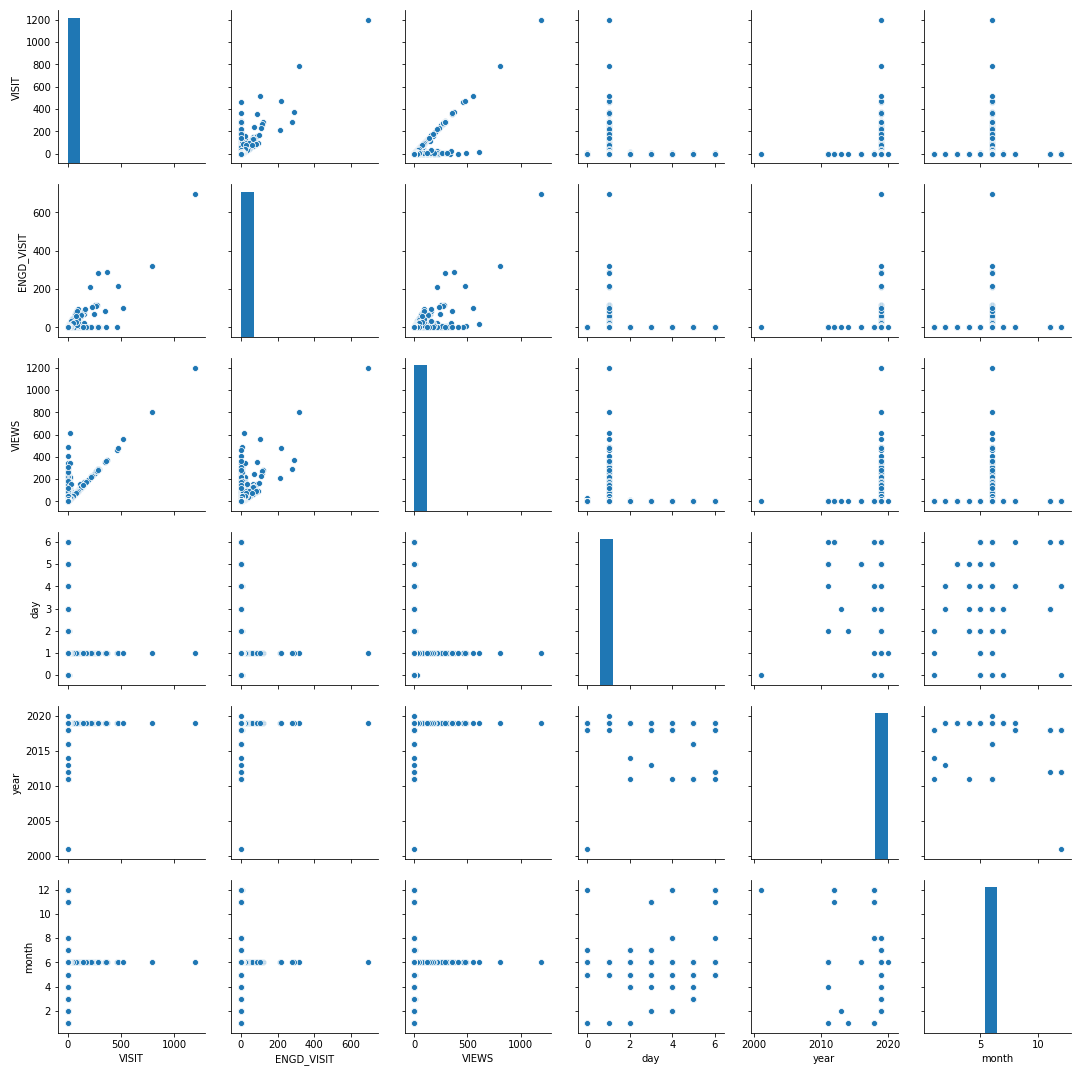

In [30]:
sns.pairplot(df)

* from above we can say that the VIEWS and VISITS have the linear Relationship.
* in months most of the values are at 6.
* in day the values are at 1.

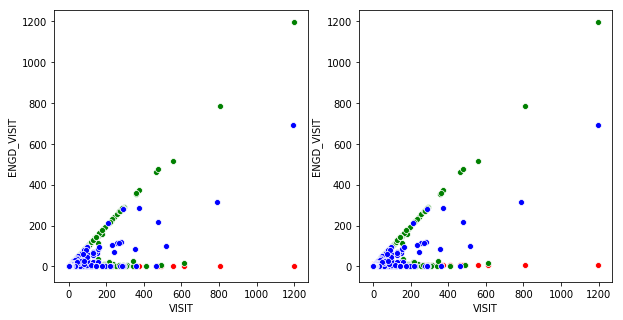

In [31]:
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
sns.scatterplot(df.VIEWS,df.day,color='r')
sns.scatterplot(df.VIEWS,df.VISIT,color='g')
sns.scatterplot(df.VISIT,df.ENGD_VISIT,color='b')

plt.subplot(1,2,2)
sns.scatterplot(df.VIEWS,df.month,color='r')
sns.scatterplot(df.VIEWS,df.VISIT,color='g')
sns.scatterplot(df.VISIT,df.ENGD_VISIT,color='b')

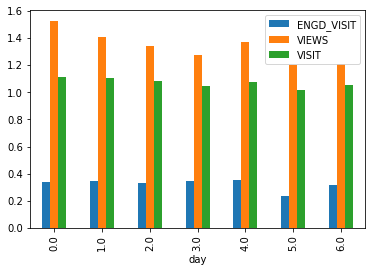

In [32]:
df.pivot_table(['VISIT','VIEWS','ENGD_VISIT'],('day')).plot(kind='bar')

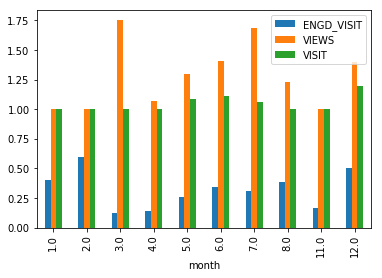

In [33]:
df.pivot_table(['VISIT','VIEWS','ENGD_VISIT'],('month')).plot(kind='bar')

In [34]:
data=df.pivot_table(['VISIT','VIEWS','ENGD_VISIT','day','month'],('ip_addr'),aggfunc='sum')

In [35]:
data

,ENGD_VISIT,VIEWS,VISIT,day,month
ip_addr,,,,,
00000bfd838fedd4c2adff293a64d5efa3406b27053a10238440534d212470e8,0,4,4,3.0,18.0
00002f7fddaa273634e38ec7004224498baa7a46cf26407a425fa5a4c94aaaed,0,2,2,2.0,12.0
0000694257f2882ccebb6a5431a8ebca19063252492891fee7dbe26aee8560a3,0,1,1,1.0,6.0
0000a229c86f8baa193ffdcf9c2a88f83a91b9faad73f72e2ab9f7aa8ad6ff76,0,2,2,2.0,12.0
0000faf7927142fa7fbc189d4a1bf23e4eb0c8d3b49c622ffea57e6cd788cd64,0,1,1,1.0,6.0
...,...,...,...,...,...
ffffa1ae0a36534162e15078911536c8914a7a7f90c20f267fb4c62a40eec34d,10,14,13,12.0,72.0
ffffa68b238435f809c6ec7390520b9b74981a5b80681cb71ae8304417fcfb66,0,1,1,1.0,6.0
ffffa71a3d7210fbada572e51dfc5c923e26dce557043900aaf4dc8bc19228ac,1,1,1,1.0,6.0


#### 449283 Unique ip_addr with data

In [36]:
columns=['VISIT','VIEWS','ENGD_VISIT','day','month']
df1=pd.DataFrame(data[columns])
df1.dropna(inplace=True)

In [37]:
df1

,VISIT,VIEWS,ENGD_VISIT,day,month
ip_addr,,,,,
00000bfd838fedd4c2adff293a64d5efa3406b27053a10238440534d212470e8,4,4,0,3.0,18.0
00002f7fddaa273634e38ec7004224498baa7a46cf26407a425fa5a4c94aaaed,2,2,0,2.0,12.0
0000694257f2882ccebb6a5431a8ebca19063252492891fee7dbe26aee8560a3,1,1,0,1.0,6.0
0000a229c86f8baa193ffdcf9c2a88f83a91b9faad73f72e2ab9f7aa8ad6ff76,2,2,0,2.0,12.0
0000faf7927142fa7fbc189d4a1bf23e4eb0c8d3b49c622ffea57e6cd788cd64,1,1,0,1.0,6.0
...,...,...,...,...,...
ffffa1ae0a36534162e15078911536c8914a7a7f90c20f267fb4c62a40eec34d,13,14,10,12.0,72.0
ffffa68b238435f809c6ec7390520b9b74981a5b80681cb71ae8304417fcfb66,1,1,0,1.0,6.0
ffffa71a3d7210fbada572e51dfc5c923e26dce557043900aaf4dc8bc19228ac,1,1,1,1.0,6.0


In [38]:
# Let's scale the data fisrt
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df1.VIEWS=scaler.fit_transform(df1[['VIEWS']])
df1.VISIT=scaler.fit_transform(df1[['VISIT']])
df1.ENGD_VISIT=scaler.fit_transform(df1[['ENGD_VISIT']])
df1.day=scaler.fit_transform(df1[['day']])
df1.month=scaler.fit_transform(df1[['month']])

In [39]:
# using k-means to make 2 cluster groups
from sklearn.cluster import KMeans
km=KMeans(n_clusters=2)

In [40]:
y_pred=km.fit_predict(df1)

In [41]:
df1['cluster']=y_pred

In [42]:
# For plotting the graph of cluster
p=df1[df1.cluster==0]
q=df1[df1.cluster==1]

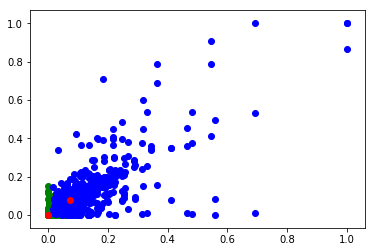

In [43]:
plt.scatter(p.VISIT,p.day,color='g')
plt.scatter(p.VISIT,p.VIEWS,color='g')
plt.scatter(p.VISIT,p.ENGD_VISIT,color='g')

plt.scatter(q.VISIT,q.day,color='b')
plt.scatter(q.VISIT,q.VIEWS,color='b')
plt.scatter(q.VISIT,q.ENGD_VISIT,color='b')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='red')

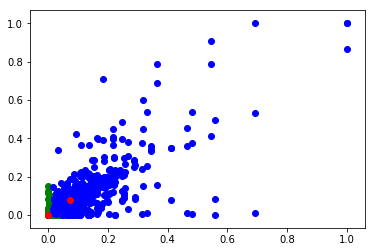

In [44]:
plt.scatter(p.VISIT,p.month,color='g')
plt.scatter(p.VISIT,p.VIEWS,color='g')
plt.scatter(p.VISIT,p.ENGD_VISIT,color='g')

plt.scatter(q.VISIT,q.month,color='b')
plt.scatter(q.VISIT,q.VIEWS,color='b')
plt.scatter(q.VISIT,q.ENGD_VISIT,color='b')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='red')

* Reds are the Center point for K
* Blues are the BOTS
* Greens are the Humans

In [45]:
data['BOT']=y_pred

In [46]:
data[data.BOT==1]

,ENGD_VISIT,VIEWS,VISIT,day,month,BOT
ip_addr,,,,,,
00099b9633602eacab5e5dbe6f33bef809352883993334b9330266cb8d546fc1,15,143,133,131.0,786.0,1
006fce7b2ba8352d4b2a9efe18475fb017e1bc0c78f6e6c1885054af4c2c43cc,44,183,117,103.0,618.0,1
01250e1a334e6fc815c8b4cb0203ec0dc6420868ef804b78151115a8402a4a11,33,136,101,90.0,540.0,1
01c754b2593e4b4af8240bc334b9dd202f8c95c5dafe317ed07985aea61b24a4,26,121,81,76.0,456.0,1
01dbbaff14cf4756f27f4a5250bf5f861fa58937207f88137e6ea85dc065fe95,31,125,65,59.0,354.0,1
...,...,...,...,...,...,...
ffa82df0719f32afe839d25f1b1de44e43e2b69477c762e2d35bf9a32f10e740,46,191,118,110.0,660.0,1
ffabc371272e20ac377ea0a6357a908c79d85a2cff7e08dd2468add3fb545d38,68,148,136,43.0,258.0,1
ffca302bc73b302318ed4e9343ced97445aad3396c894460faf30187308d6db9,44,131,119,102.0,612.0,1


### Overall 814 ip detected as a BOT.

### Thank YOU.